#### Assignment 5: Regression by Ryan Martin 6/20/19

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
Beijing = pd.read_csv("https://raw.github.ccs.neu.edu/eaguiar/CS7180_Summer2019/master/data/assignment5/Beijing.csv?token=AAASxc3_CRAzxkGRQGceNjTJQ7I86f38ks5dDw4uwA%3D%3D")
Chengdu = pd.read_csv("https://raw.github.ccs.neu.edu/eaguiar/CS7180_Summer2019/master/data/assignment5/Chengdu.csv?token=AAASxQtogvMsZhu5JPTylCT7PBX6BsbAks5dDw60wA%3D%3D")
Guangzhou = pd.read_csv("https://raw.github.ccs.neu.edu/eaguiar/CS7180_Summer2019/master/data/assignment5/Guangzhou.csv?token=AAASxWsPZ9pMyNAFRR_VJklkAgoILBvZks5dDw7rwA%3D%3D")
Shanghai = pd.read_csv("https://raw.github.ccs.neu.edu/eaguiar/CS7180_Summer2019/master/data/assignment5/Shanghai.csv?token=AAASxfYMwAV1MWmVZdfYIFCfPwYszA97ks5dDw8vwA%3D%3D")
Shenyang = pd.read_csv("https://raw.github.ccs.neu.edu/eaguiar/CS7180_Summer2019/master/data/assignment5/Shenyang.csv?token=AAASxUTuFRIXWkOyiIwMPh4IkMX2cikpks5dDw9rwA%3D%3D")
Shenyang["City"] = "Shenyang"
Beijing["City"] = "Beijing"
Chengdu["City"] = "Chengdu"
Guangzhou["City"] = "Guangzhou"
Shanghai["City"] = "Shanghai"

all_data = [Beijing, Chengdu, Guangzhou, Shanghai, Shenyang]
cities = pd.concat(all_data)

In [3]:
cities.head()

,year,month,day,hour,season,PM,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,City
0,2010,1,1,0,4.0,NaN,-21.0,43.0,1021.0,-11.0,1.79,0.0,0.0,Beijing
1,2010,1,1,1,4.0,NaN,-21.0,47.0,1020.0,-12.0,4.92,0.0,0.0,Beijing
2,2010,1,1,2,4.0,NaN,-21.0,43.0,1019.0,-11.0,6.71,0.0,0.0,Beijing
3,2010,1,1,3,4.0,NaN,-21.0,55.0,1019.0,-14.0,9.84,0.0,0.0,Beijing
4,2010,1,1,4,4.0,NaN,-20.0,51.0,1018.0,-12.0,12.97,0.0,0.0,Beijing


In [4]:
city_data = cities.pivot_table( columns = ["year", "City", "PM" ])

#### Which of the 5 cities has the largest temperature range (e.g., highest temperature - lowest temperature) during the period the dataset was collected?

#### Answer: Shenyang, 63.0

In [5]:
temp_range = (cities.pivot_table("TEMP", "City", aggfunc = 'max', fill_value = 'linear')-cities.pivot_table("TEMP", "City", aggfunc = 'min', fill_value = 'linear')).sort_values(by="TEMP", ascending=False)
temp_range

,TEMP
City,
Shenyang,63.000000
Beijing,61.000000
Shanghai,46.000000
Chengdu,41.000000
Guangzhou,35.700002


#### Which cities would you consider to be the most and least polluted? Explain the logic for your answer in detail.

In [6]:
cities.pivot_table("PM", "City", aggfunc = 'mean', fill_value = 'linear').sort_values(by = "PM", ascending = False)

,PM
City,
Beijing,95.904241
Chengdu,83.407612
Shenyang,75.837500
Shanghai,52.910544
Guangzhou,50.803938


#### For this question, I created a pivot table (see above) that indexed that values of PM (particulate matter) by city, using an aggregate function 'mean' to find the average polution of the cities in China. I also filled in the missing values linearly, in order to capture all data. Finally, I sorted the data frame by PM, which returned data that was consistent with the findings in the article "PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities", where Beijing and Chengdu have the worst polution, and Shanghai and Guangzhou have better air quality. This is a very serious issue, and I am happy to know that these levels of population have dropped in the last two years because air quality is important for the quality of life in any city around the world. 

#### What is the average temperature for each of the four seasons in each of the cities?

#### Answer: For all the average temperatures by season for each city, I created a data frame using pivot table, which is displayed below. 

In [7]:
average_temp = cities.pivot_table("TEMP", "City", "season", aggfunc = 'mean', fill_value = 'linear')
average_temp

season,1.0,2.0,3.0,4.0
City,,,,
Beijing,14.008455,25.852710,12.623598,-2.434568
Chengdu,18.258194,25.966364,18.356543,8.052331
Guangzhou,21.906167,28.203261,23.635798,14.099237
Shanghai,15.982709,27.705798,19.765703,6.227308
Shenyang,9.456422,23.612061,9.809549,-9.199953


#### Where are the hottest summer and coldest winters observed? Explain how you defined hottest and coldest.

#### If you were to consider hottest and coldest by just temperature and not relative humidity and precipitation then these would be the results:

In [8]:
cities.pivot_table("TEMP", "City", aggfunc = 'max', fill_value = 'linear').sort_values(by="TEMP",ascending=False).head(1)

,TEMP
City,
Beijing,42.0


In [9]:
cities.pivot_table("TEMP", "City", aggfunc = 'min', fill_value = 'linear').sort_values(by="TEMP", ascending=True).head(1)

,TEMP
City,
Shenyang,-28.0


#### If you were to consider hottest and coldest by temperature and relative humidity, and precipitation for winter months, then these would be the results:

#### Hot and humid summer

In [10]:
cities[(cities["TEMP"]>40) & (cities["HUMI"]>30) & (cities["season"] == 2.0)].pivot_table("TEMP", "City", aggfunc = 'mean', fill_value = 'linear').sort_values(by="TEMP", ascending=False).head()

,TEMP
City,
Shanghai,41.0


#### Wet and cold winter

In [11]:
cities[(cities["TEMP"]<-27) & (cities["PRES"]>1000) & (cities["season"] == 4.0)].pivot_table("TEMP", "City", aggfunc = 'mean', fill_value = 'linear').sort_values(by="TEMP", ascending=True).head(1)

,TEMP
City,
Shenyang,-28.0


#### Which feature appears to contain the largest amount of missing data overall?

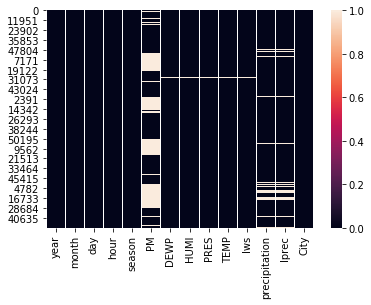

In [12]:
sns.heatmap(cities.isnull())

In [13]:
cities["PM"].isnull().count()

262920

#### There are 262920 instances of missing data for PM, which is the most missing data.

#### Using your library of choice, generate a line chart showing the temperate (y-axis) and dates (x-axis) for one of the five cities. Is there a noticeable seasonal pattern?

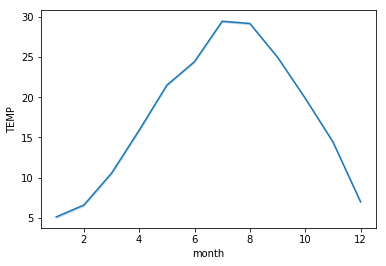

In [14]:
sns.lineplot(y = "TEMP", x = "month", data = Shanghai)

#### Create a boxplot showing the temperature values aggregated by month for one of thefive cities.

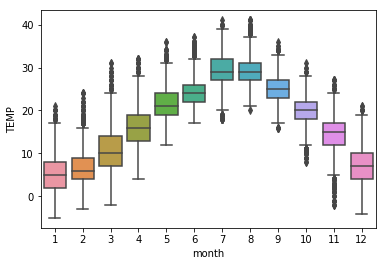

In [15]:
sns.boxplot(y = "TEMP", x = "month", data = Shanghai)

#### Create a scatter plot using two features of your choice. Choose a pair of features that you believe have some correlation between them. Based on your visualization, do they seem to be correlated?

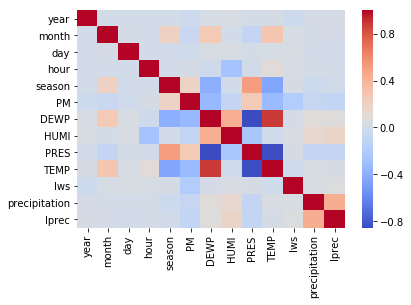

In [16]:
sns.heatmap(Shanghai.corr(),cmap='coolwarm')

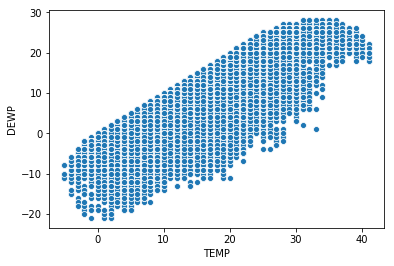

In [17]:
sns.scatterplot(x="TEMP", y="DEWP", data=Shanghai)

#### There seems to be a positive correlation between the "TEMP" and "DEWP" for the city of Shanghai data. 

#### Create a single plot that illustrates the value of the PM column over time for each of the four cities. Color and label each city differently so that they can be distinguished easily.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

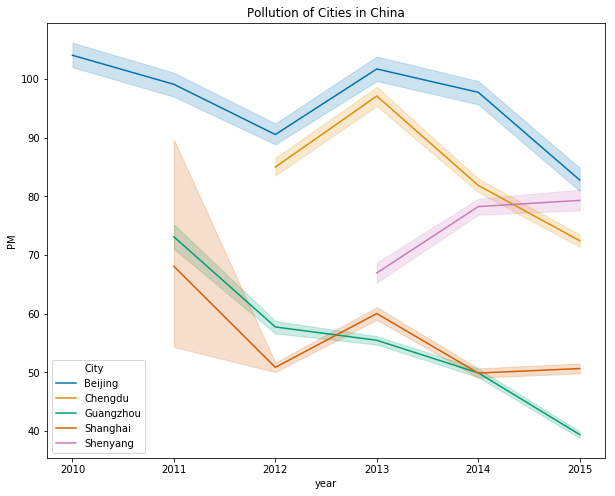

In [19]:
plt.figure(figsize=(10,8))
plt.title("Pollution of Cities in China")
sns.lineplot(x="year", y="PM", hue="City", data = cities, palette = "colorblind")

#### Train and evaluate (usingr-squared) a linear regression model to predict the PMvalue. Repeat this for each city and be sure to evaluate your model using theXtestset.

#### Linear Regression Model for Beijing PM

In [20]:
from sklearn.model_selection import train_test_split # Drop rows that have missing values
Beijing = pd.read_csv("https://raw.github.ccs.neu.edu/eaguiar/CS7180_Summer2019/master/data/assignment5/Beijing.csv?token=AAASxc3_CRAzxkGRQGceNjTJQ7I86f38ks5dDw4uwA%3D%3D")
Beijing = Beijing.dropna()
# Treat the column PM as our predictive objective
y_Beijing = Beijing["PM"]
# All other columns will be used as features when training our model
X_Beijing = Beijing.drop(["PM"], axis=1)
#X_Beijing = Beijing.drop(["City"], axis=1)
# Split 70% of the data for training and leave out 30% for testing
X_train_Beijing, X_test_Beijing, y_train_Beijing, y_test_Beijing = train_test_split(X_Beijing, y_Beijing, test_size=0.3, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train_Beijing,y_train_Beijing)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
predictions_Beijing = lm.predict(X_test_Beijing)

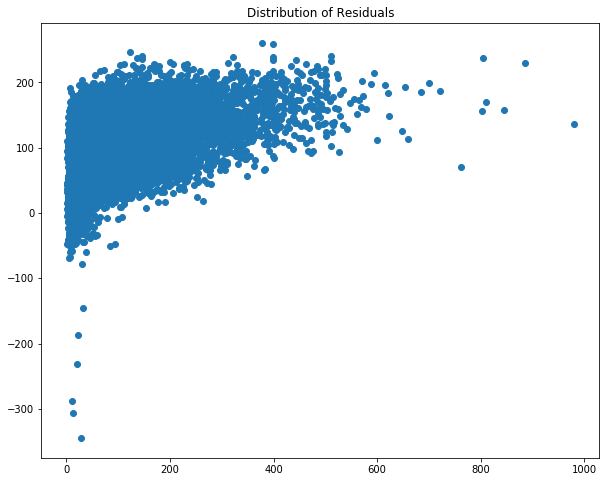

In [25]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Residuals")
plt.scatter(y_test_Beijing, predictions_Beijing)

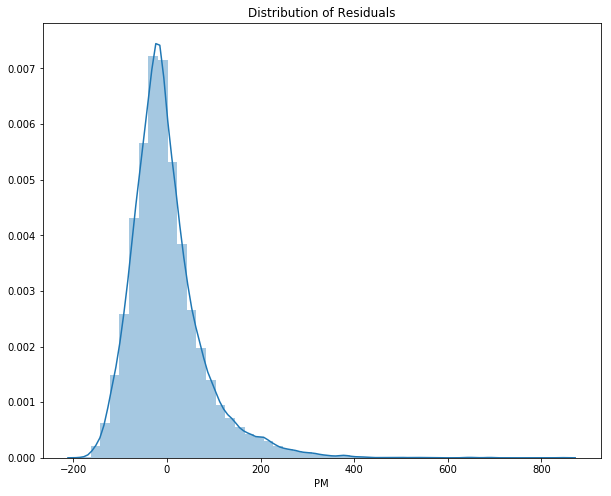

In [26]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Residuals")
sns.distplot(y_test_Beijing-predictions_Beijing);

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [28]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_Beijing, predictions_Beijing))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_Beijing, predictions_Beijing))

Coefficients: 
 [-2.32063071 -1.94832893  0.68164487  2.02829962  5.54101969 -1.64073461
  1.98391603 -1.69303839 -0.74956986 -0.25225562 -3.37983666 -2.03498106]
Mean squared error: 6174.67
Variance score: 0.27


#### Linear Regression Model for Chengdu PM

In [29]:
Chengdu = pd.read_csv("https://raw.github.ccs.neu.edu/eaguiar/CS7180_Summer2019/master/data/assignment5/Chengdu.csv?token=AAASxQtogvMsZhu5JPTylCT7PBX6BsbAks5dDw60wA%3D%3D")
Chengdu = Chengdu.dropna()
# Treat the column PM as our predictive objective
y = Chengdu["PM"]
# All other columns will be used as features when training our model
X = Chengdu.drop(["PM"], axis=1)
#X = Chengdu.drop(["City"], axis=1)
# Split 70% of the data for training and leave out 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
predictions = lm.predict(X_test)

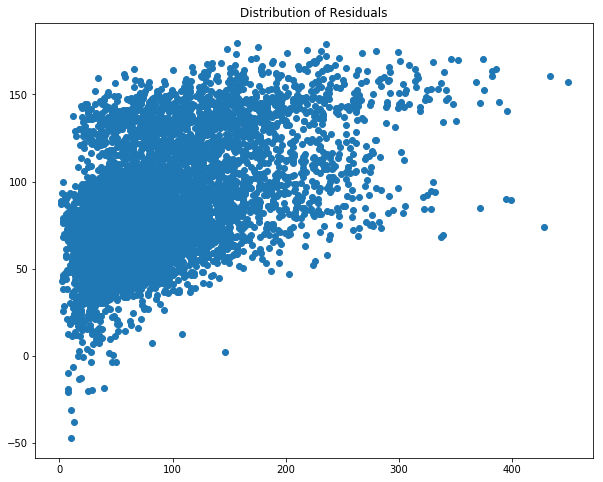

In [32]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Residuals")
plt.scatter(y_test,predictions)

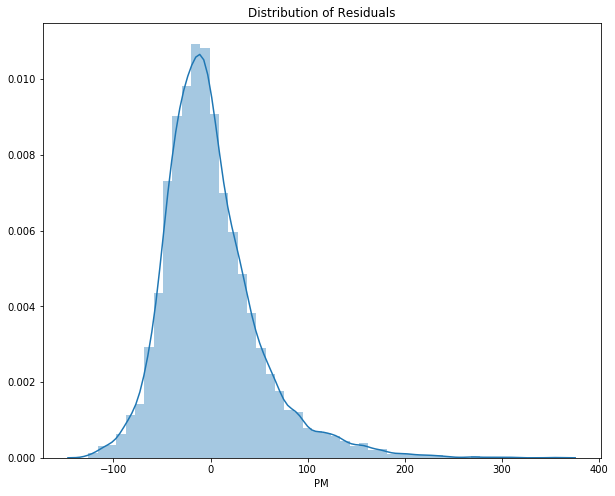

In [33]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Residuals")
sns.distplot(y_test-predictions);

In [34]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [-8.41972235e+00 -3.87064563e+00  4.15945152e-01  2.15441554e-01
  1.15986849e+01 -2.44599276e+00  7.14275737e-01 -6.60095913e-01
  4.34139000e-03 -1.38481517e+00 -8.29891491e-01 -6.29922152e-01]
Mean squared error: 2435.24
Variance score: 0.27


In [35]:
Guangzhou = pd.read_csv("https://raw.github.ccs.neu.edu/eaguiar/CS7180_Summer2019/master/data/assignment5/Guangzhou.csv?token=AAASxWsPZ9pMyNAFRR_VJklkAgoILBvZks5dDw7rwA%3D%3D")
Guangzhou = Guangzhou.dropna()
# Treat the column PM as our predictive objective
y = Guangzhou["PM"]
# All other columns will be used as features when training our model
X = Guangzhou.drop(["PM"], axis=1)
#X = Guangzhou.drop(["City"], axis=1)
# Split 70% of the data for training and leave out 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
predictions = lm.predict(X_test)

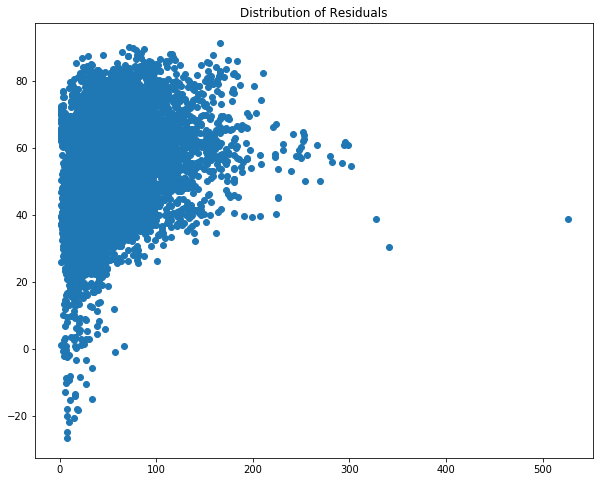

In [38]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Residuals")
plt.scatter(y_test,predictions)

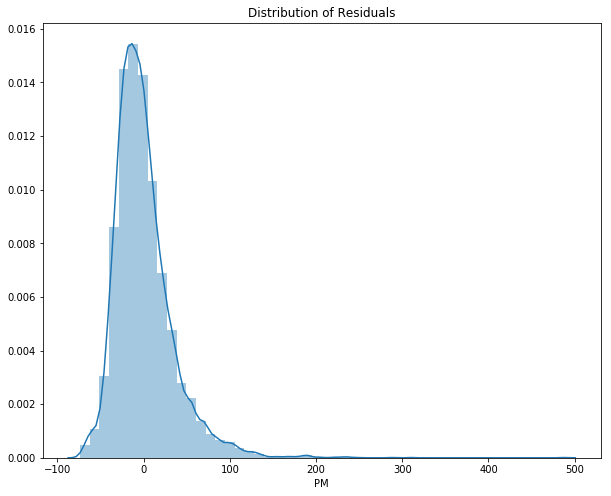

In [39]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Residuals")
sns.distplot(y_test-predictions);

In [40]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [-7.53740954 -1.58065661  0.05325388  0.30920397  4.17263023 -0.0624612
  0.06107282  0.60918724 -0.36643455 -0.34118486 -0.15143836 -0.49971219]
Mean squared error: 1162.85
Variance score: 0.14


#### Linear Regression Model for Shanghai PM

In [41]:
Shanghai = pd.read_csv("https://raw.github.ccs.neu.edu/eaguiar/CS7180_Summer2019/master/data/assignment5/Shanghai.csv?token=AAASxfYMwAV1MWmVZdfYIFCfPwYszA97ks5dDw8vwA%3D%3D")
Shanghai = Shanghai.dropna()
# Treat the column PM as our predictive objective
y = Shanghai["PM"]
# All other columns will be used as features when training our model
X = Shanghai.drop(["PM"], axis=1)
#X = Shanghai.drop(["City"], axis=1)
# Split 70% of the data for training and leave out 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
predictions = lm.predict(X_test)

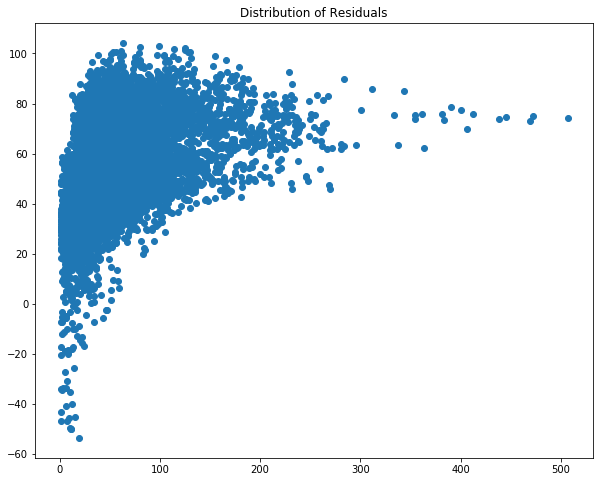

In [44]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Residuals")
plt.scatter(y_test,predictions)

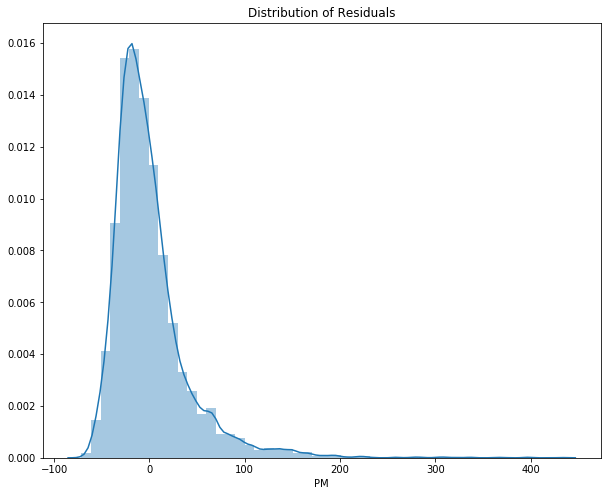

In [45]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Residuals")
sns.distplot(y_test-predictions);

In [46]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [-0.70502994  0.51348601  0.02472921  0.19575094  3.02377221  0.17815762
 -0.37336788 -1.19350145 -2.56550527 -0.11929754 -0.81071156 -0.39275991]
Mean squared error: 1615.28
Variance score: 0.17


#### Linear Regression Model for Shenyang PM

In [47]:
Shenyang = pd.read_csv("https://raw.github.ccs.neu.edu/eaguiar/CS7180_Summer2019/master/data/assignment5/Shenyang.csv?token=AAASxUTuFRIXWkOyiIwMPh4IkMX2cikpks5dDw9rwA%3D%3D")
Shenyang = Shenyang.dropna()
# Treat the column PM as our predictive objective
y = Shenyang["PM"]
# All other columns will be used as features when training our model
X = Shenyang.drop(["PM"], axis=1)
#X = Shenyang.drop(["City"], axis=1)
# Split 70% of the data for training and leave out 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
predictions = lm.predict(X_test)

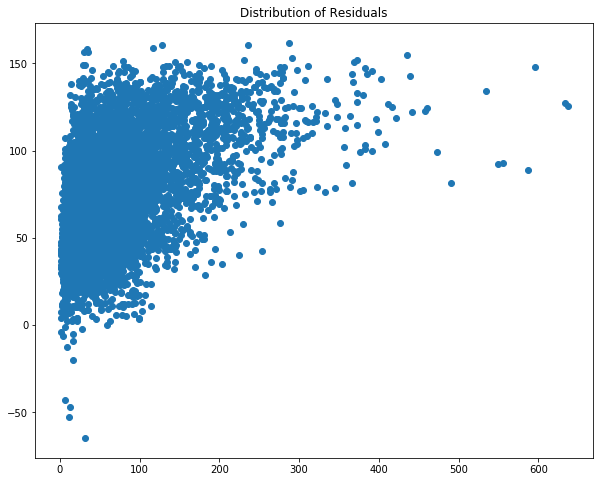

In [50]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Residuals")
plt.scatter(y_test,predictions)

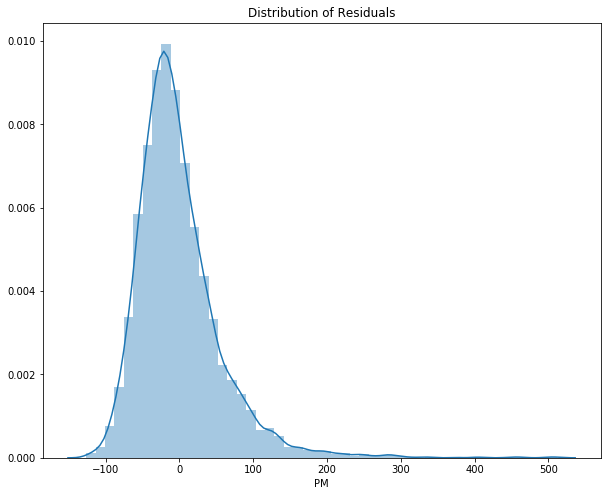

In [51]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Residuals")
sns.distplot(y_test-predictions);

In [52]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [ 1.23003534 -0.62683933  0.73586609 -0.01349361  1.92683527 -1.77479626
  1.17375445  2.13928104  1.21117482 -0.02935194  1.73504025 -1.80059997]
Mean squared error: 3292.31
Variance score: 0.22


#### Use the dataset for one city of your choice for training and evaluate your linear regression on the dataset of another city. How do your results compare to when you used datafrom the same city for both training and testing?

In [53]:
# training dataset from Shanghai and evaluation on Beijing
Shanghai = Shanghai.dropna()
# Treat the column PM as our predictive objective
y_shanghai = Shanghai["PM"]
# All other columns will be used as features when training our model
X_shanghai = Shanghai.drop(["PM"], axis=1)
#X_shanghai = Shanghai.drop(["City"], axis=1)
# Split 70% of the data for training and leave out 30% for testing
Shanghai_X_train, Shanghai_X_test, Shanghai_y_train, Shanghai_y_test = train_test_split(X_shanghai, y_shanghai, test_size=0.3, random_state=42)

In [54]:
lm.fit(Shanghai_X_train,Shanghai_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
Beijing = Beijing.dropna()
# Treat the column PM as our predictive objective
y_beijing = Beijing["PM"]
# All other columns will be used as features when training our model
X_beijing = Beijing.drop(["PM"], axis=1)
#X_beijing = Beijing.drop(["City"], axis=1)
# Split 70% of the data for training and leave out 30% for testing
Beijing_X_train, Beijing_X_test, Beijing_y_train, Beijing_y_test = train_test_split(X_beijing, y_beijing, test_size=0.3, random_state=42)


In [56]:
predictions = lm.predict(Shanghai_X_test)

In [57]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Beijing_y_test[:9564], predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Beijing_y_test[:9564], predictions))

Coefficients: 
 [-0.70502994  0.51348601  0.02472921  0.19575094  3.02377221  0.17815762
 -0.37336788 -1.19350145 -2.56550527 -0.11929754 -0.81071156 -0.39275991]
Mean squared error: 10490.14
Variance score: -0.25


#### Using the dataset for Shanghai for training and evaluating the linear regression model on the dataset of Beijing results in an error because the sample sizes of the datasets are different and the model cannot be evaluated with inconsistant sample sizes. Passing in a "hardcoded" index of the correct sample size allows the evaluation R squared test to happen, but that results in a negative variance score of -.15, which basically means that we cannot make any prediction based on the evaluation. Training a dataset and then evaluating the same dataset will usually result in a positive value, depending on the quality of the data and the linear relationship of that data. My variance scores for Shanghai and Beijing were much higher when evaluated correctly. 

#### Using a city of your choice, train and evaluate a linear regression to predict the values of one of the other columns (not PM). Is there a particular column that seems to be easier to predict than others? Why do you think that is?

In [58]:
# training dataset from Shanghai and evaluation on Beijing
Shanghai = Shanghai.dropna()
# Treat the column PM as our predictive objective
y = Shanghai["TEMP"]
# All other columns will be used as features when training our model
X = Shanghai.drop(["TEMP"], axis=1)
#X = Shanghai.drop(["City"], axis=1)
# Split 70% of the data for training and leave out 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
predictions = lm.predict(X_test)

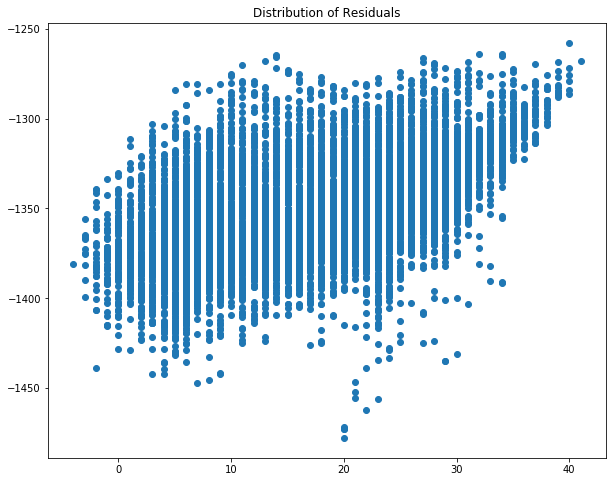

In [60]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Residuals")
plt.scatter(y_test,predictions)

In [61]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [-0.70502994  0.51348601  0.02472921  0.19575094  3.02377221  0.17815762
 -0.37336788 -1.19350145 -2.56550527 -0.11929754 -0.81071156 -0.39275991]
Mean squared error: 1870536.40
Variance score: -21624.49


#### Since the R squared method represents the goodness of fit, we can say by the results of this regression model, which measures the relationship between TEMP and the other features of the dataset, that the data points do not fit a line, so our variance score is -9484.89. The variability of TEMP cannot be explained by the regression model in this case. PM is easier to predict because there is some correlation between that target variable and the other features, which give a positive variance score and a strong regression model. 

#### 1.4 Bonus question [+20 pts]
#### If you had to choose one of these cities as your next home, based on the data you analyzed from these datasets, which one would you choose? Post your answer along with a detailed explanation of how you made that choice and any supporting visualizations to the slack channel #assignment 5 bonus

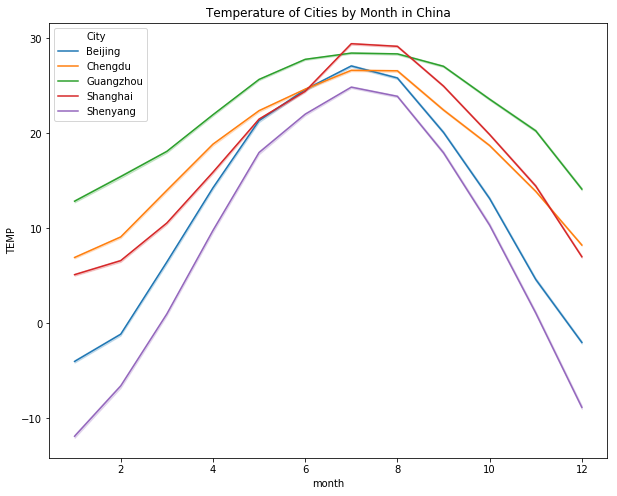

In [62]:
plt.figure(figsize=(10,8))
plt.title("Temperature of Cities by Month in China")
sns.lineplot(y = "TEMP", x = "month", data = cities, hue = "City")

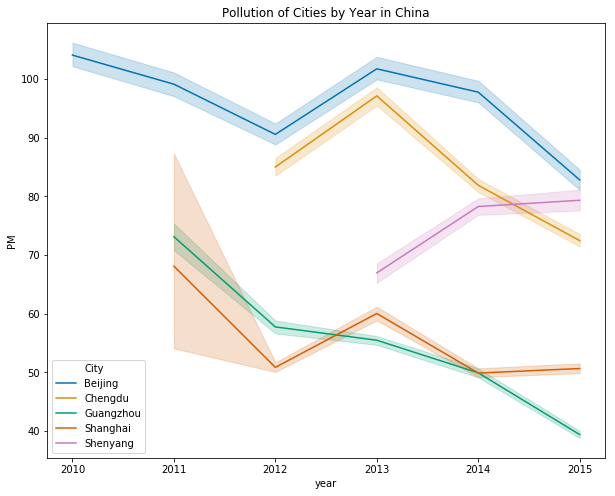

In [63]:
plt.figure(figsize=(10,8))
plt.title("Pollution of Cities by Year in China")
sns.lineplot(x="year", y="PM", hue="City", data = cities, palette = "colorblind")

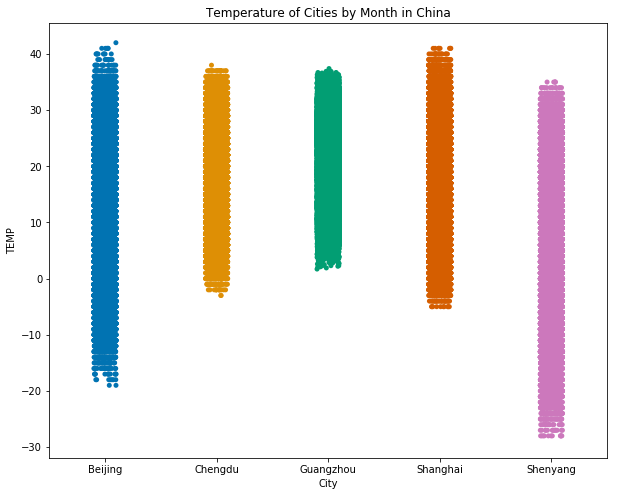

In [64]:
plt.figure(figsize=(10,8))
plt.title("Temperature of Cities by Month in China")
sns.stripplot(x="City", y="TEMP", data=cities, palette = "colorblind")

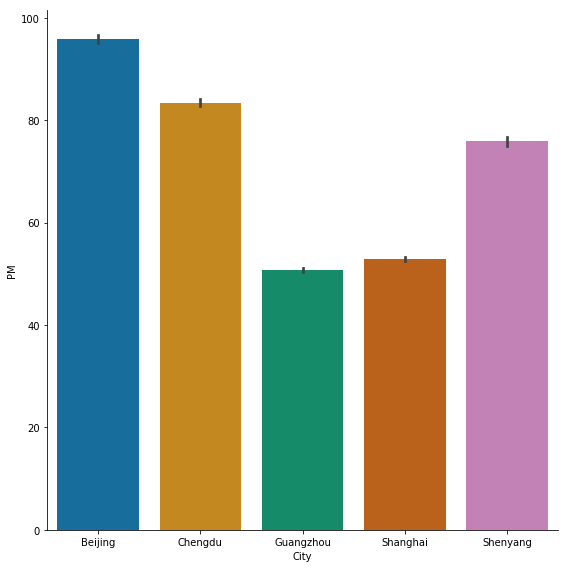

In [65]:
sns.catplot(x="City", y="PM", data=cities, palette = "colorblind", kind = "bar", height = 8)

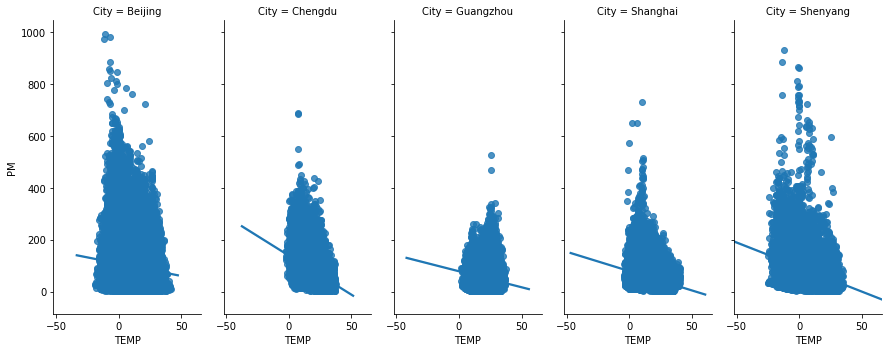

In [66]:
sns.lmplot(x="TEMP", y="PM", col="City", data=cities,
           aspect=.5);

#### This lmplot model in seaborn has a built-in function that fits regression models across conditional subsets of a dataset. In this particular lmplot model, I trained the data to measure the conditional subsets of PM and TEMP in the dataset across all cities in order to see the relationship between those two variables. Here, we see a general negative relationship between the variables TEMP and PM, meaning that lower temperatures mean higher PM. This makes sense because people need to use more energy to heat their homes during the winter months at lower temperatures, which creates more pollution during the winter. Since cold, polluted cities are not my personal preference, I would have to choose Guangzhou to be my home in China. But, despite all the pollution, which has been thankfully decreasing over the years, I still would like to visit each of these cities for the cultural experience. 